In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# sorting the data
glv2 = np.genfromtxt('car testing flash/glv2.csv', delimiter=',', names=True)

rtd1 = np.genfromtxt('car testing flash/rtd1.csv', delimiter=',', names=True)
rtd2 = np.genfromtxt('car testing flash/rtd2.csv', delimiter=',', names=True)
rtd3 = np.genfromtxt('car testing flash/rtd3.csv', delimiter=',', names=True)
rtd4 = np.genfromtxt('car testing flash/rtd4.csv', delimiter=',', names=True)

TSactive1 = np.genfromtxt('car testing flash/TSactive1.csv', delimiter=',', names=True)
TSactive2 = np.genfromtxt('car testing flash/TSactive2.csv', delimiter=',', names=True)
TSactive3 = np.genfromtxt('car testing flash/TSactive3.csv', delimiter=',', names=True)
TSactive4 = np.genfromtxt('car testing flash/TSactive4.csv', delimiter=',', names=True)
TSactive5 = np.genfromtxt('car testing flash/TSactive5.csv', delimiter=',', names=True)
TSactive6 = np.genfromtxt('car testing flash/TSactive6.csv', delimiter=',', names=True)
TSactive7 = np.genfromtxt('car testing flash/TSactive7.csv', delimiter=',', names=True)

data = glv2

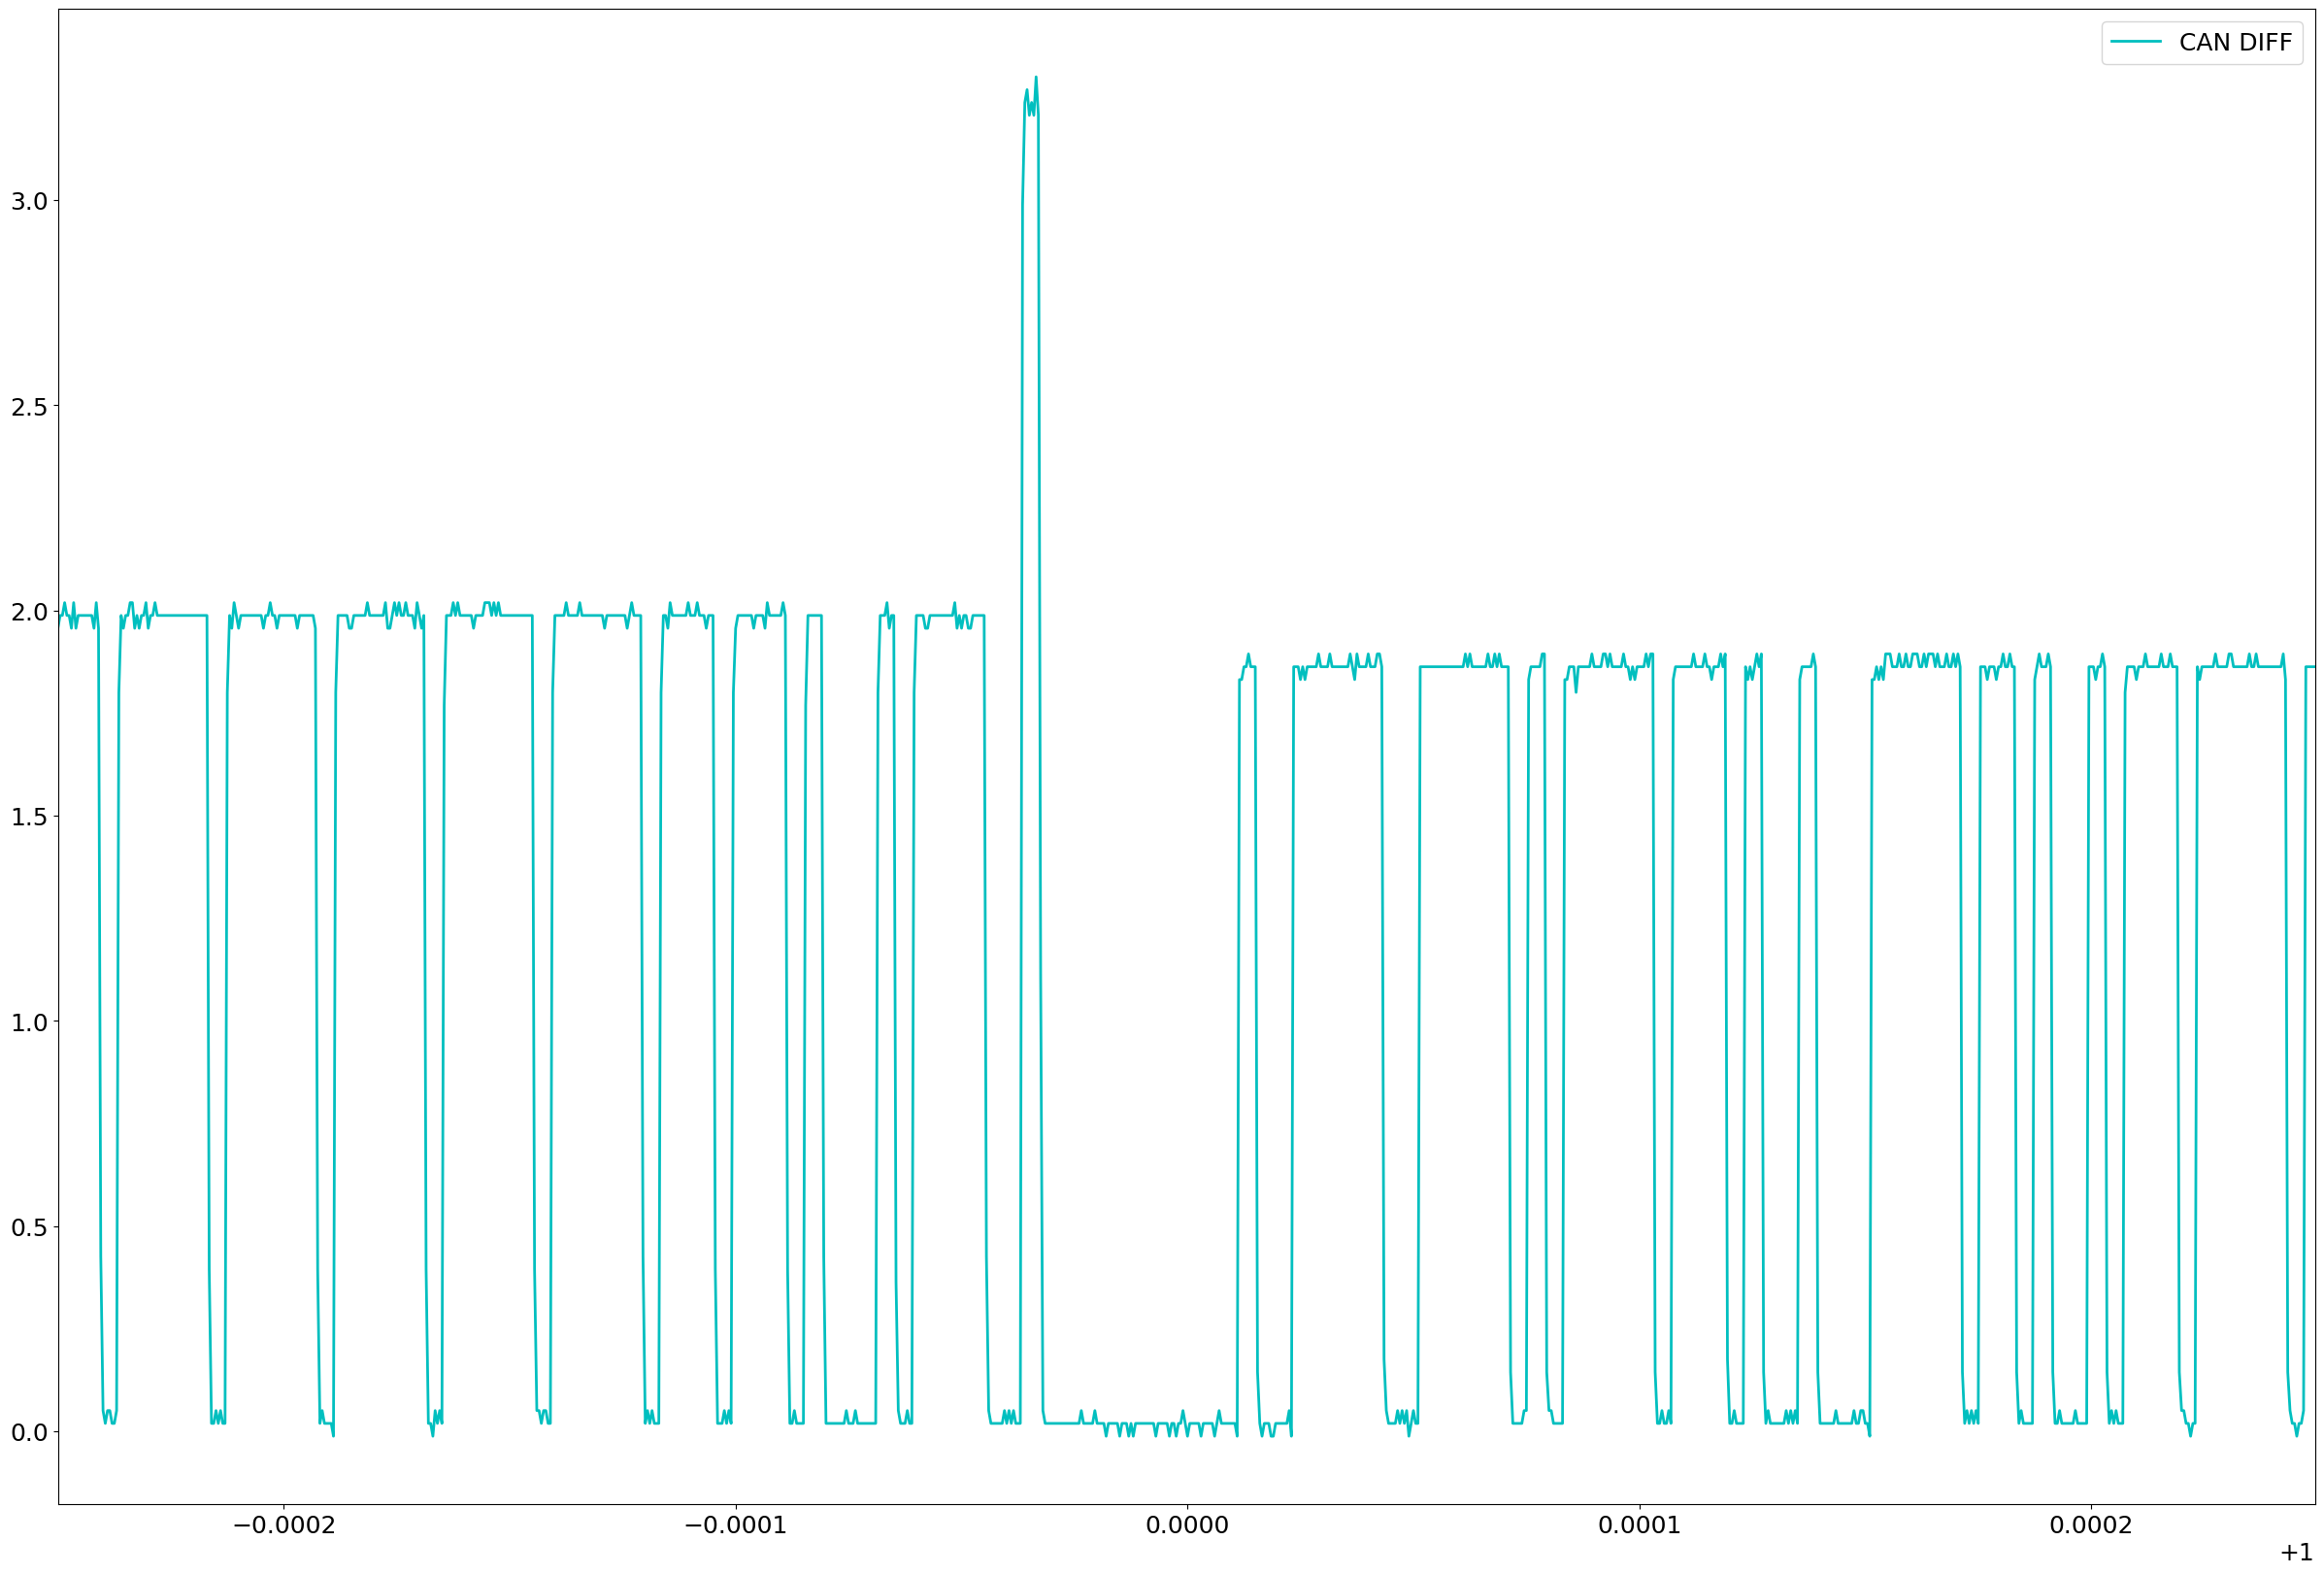

In [36]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 18})
# plt.style.use('dark_background') if want darkmode

t = data['second']
# canh = data['CANH']
# canl = data['CANL']
diff = data['Volt']

plt.plot(t,diff,color='c',linewidth=2,label='CAN DIFF')
plt.xlim(t[0],t[-1])
plt.legend()

In [37]:
# Doing FFT
n = len(t)
# Compute the FFT
fhat = np.fft.fft(canh,n)
# Power spectrum (per freq)
PSD = fhat * np.conj(fhat) / n
# Create x axis of freq
freq = (1/ * np.arange(n)
# Only plot the first half of data points?
L = np.arange(1,np.floor(n/2),dtype='int') 

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,canh,color='c',linewidth=1.5,label='CAN HIGH')
# plt.plot(t,f_clean,color='r',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',linewidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend

plt.show

SyntaxError: invalid syntax (1362852702.py, line 8)

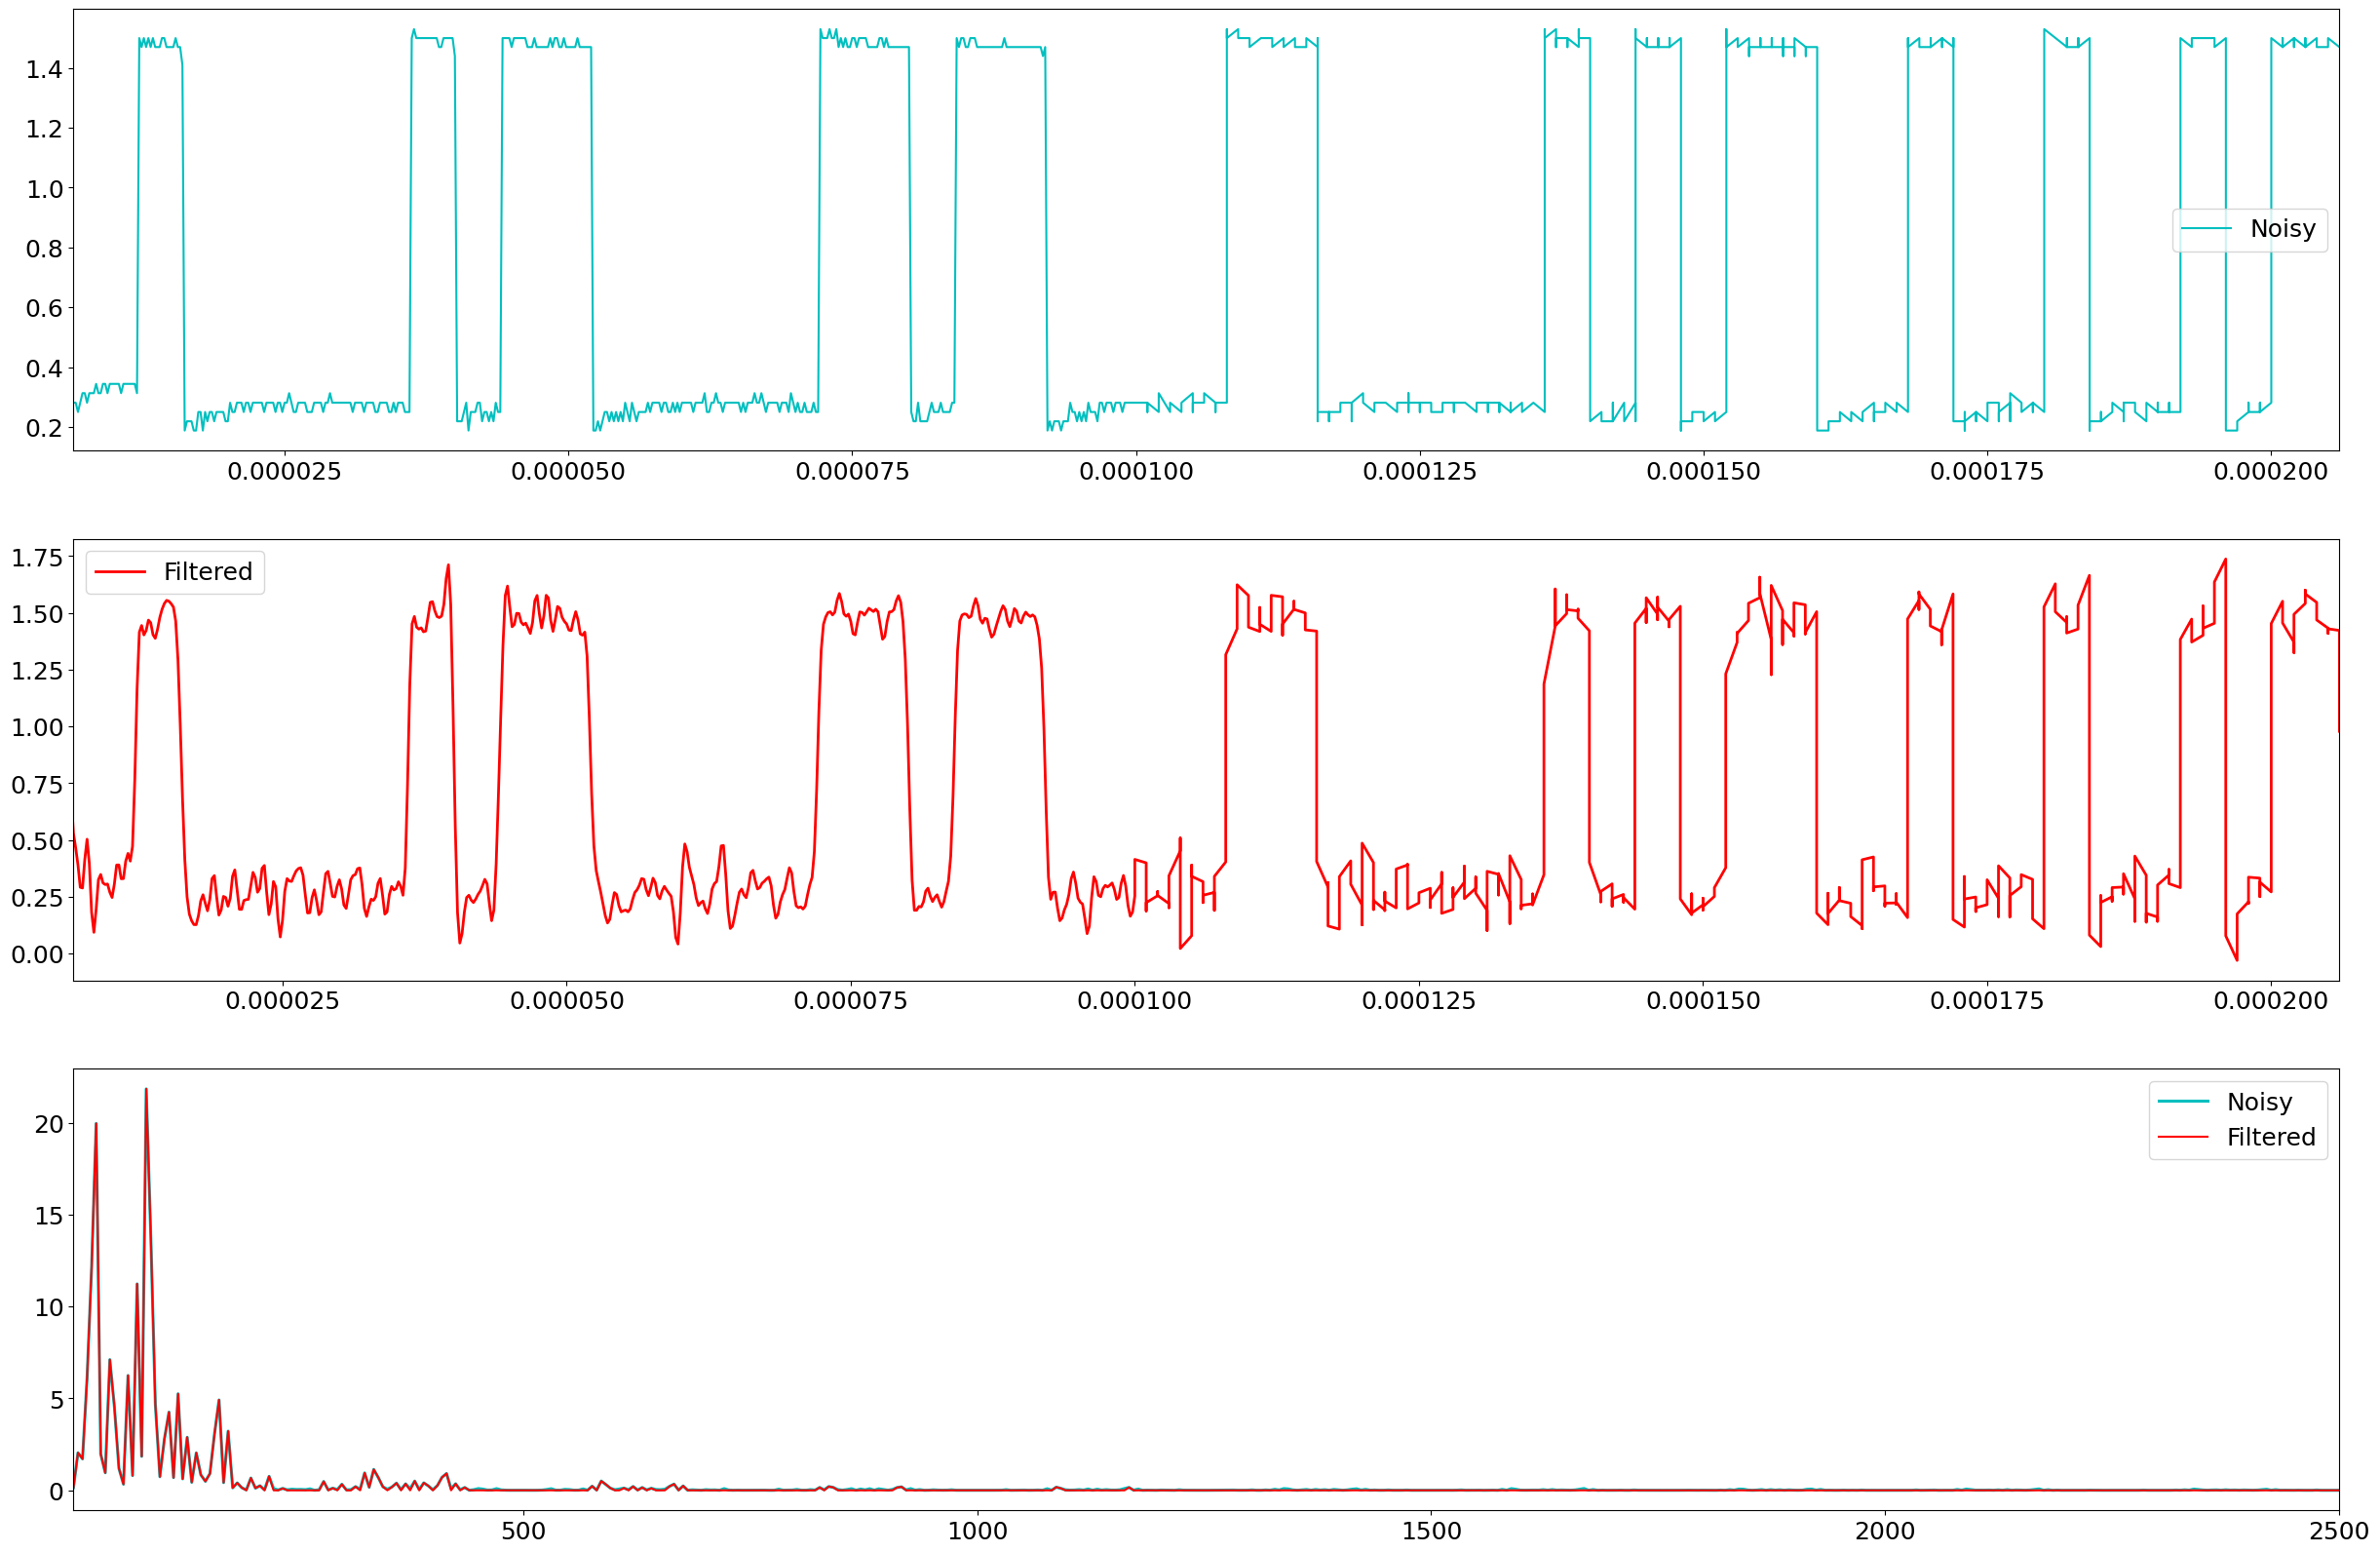

In [ ]:
## Use the PSD to filter out the noise
indices = PSD > 0.1 # Find large power freqs
PSDclean = PSD * indices # Zero out all others
fhat = indices * fhat # Zero out small Fourier coeffs in Y
ffilt = np.fft.ifft(fhat) # inverse FFT for filtered time signal

## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,canh,color='c',linewidth=1.5,label='Noisy')
# plt.plot(t,f_clean,color='r',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='r',linewidth=2,label='Filtered')
plt.xlim(t[1],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',linewidth=2.2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='r',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()